In [1]:
#Machine learning project # 1
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
# Load the dataset
file_path = 'tips.csv'
df = pd.read_csv(file_path)

In [7]:
# 1. Data Understanding and Cleaning
# Ensure dataset doesn't contain missing values or outliers
print(df.isnull().sum())

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64


In [8]:
print(df.describe())

       total_bill         tip        size
count  244.000000  244.000000  244.000000
mean    19.785943    2.998279    2.569672
std      8.902412    1.383638    0.951100
min      3.070000    1.000000    1.000000
25%     13.347500    2.000000    2.000000
50%     17.795000    2.900000    2.000000
75%     24.127500    3.562500    3.000000
max     50.810000   10.000000    6.000000


In [10]:
df.shape

(244, 7)

In [11]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [12]:
df.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

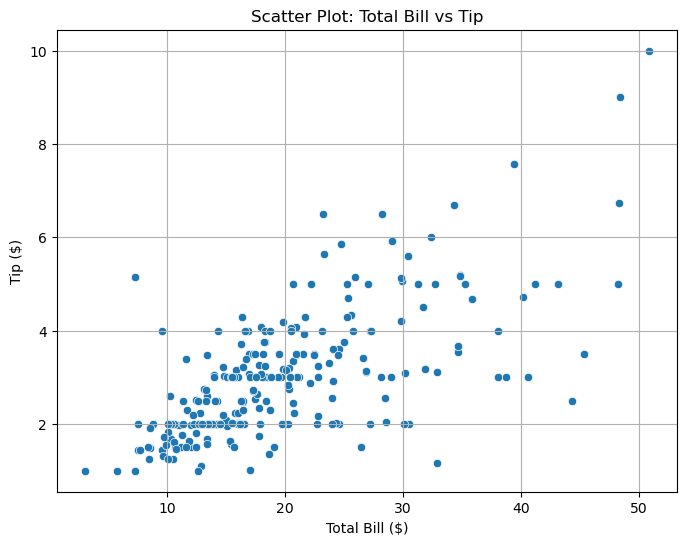

In [13]:
# 2. Data Visualization
# Scatter plot of total_bill vs tip
plt.figure(figsize=(8, 6))
sns.scatterplot(x='total_bill', y='tip', data=tips_df)
plt.title('Scatter Plot: Total Bill vs Tip')
plt.xlabel('Total Bill ($)')
plt.ylabel('Tip ($)')
plt.grid(True)
plt.show()

In [14]:
# 3. Model Building
X = tips_df[['total_bill']]  # Independent variable
y = tips_df['tip']  # Dependent variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
# 4. Model Evaluation
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Coefficient:", model.coef_)
print("Intercept:", model.intercept_)
print("MSE:", mse)
print("R-squared:", r2)

Coefficient: [0.10696371]
Intercept: 0.9252355585570555
MSE: 0.5688142529229538
R-squared: 0.5449381659234664


Classification

In [16]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [17]:
# 1. Data Preparation
# Encoding categorical variables
le = LabelEncoder()
tips_df['sex'] = le.fit_transform(tips_df['sex'])
tips_df['smoker'] = le.fit_transform(tips_df['smoker'])
tips_df['day'] = le.fit_transform(tips_df['day'])
tips_df['time'] = le.fit_transform(tips_df['time'])

# Feature Selection: we'll classify whether someone tips over the average tip
tips_df['tip_over_avg'] = (tips_df['tip'] > tips_df['tip'].mean()).astype(int)

X = tips_df[['total_bill', 'sex', 'smoker', 'day', 'time', 'size']]  # Features
y = tips_df['tip_over_avg']  # Target

In [18]:
# 2. Model Selection: Logistic Regression, Decision Tree, SVM
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)

# Decision Tree Classifier
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)

# Support Vector Classifier
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

In [19]:
# 3. Model Evaluation
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_log))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_tree))
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svc))

# Additional metrics (for Logistic Regression as an example)
print("Precision:", precision_score(y_test, y_pred_log))
print("Recall:", recall_score(y_test, y_pred_log))
print("F1 Score:", f1_score(y_test, y_pred_log))

Logistic Regression Accuracy: 0.7142857142857143
Decision Tree Accuracy: 0.5918367346938775
SVM Accuracy: 0.7142857142857143
Precision: 0.5652173913043478
Recall: 0.7647058823529411
F1 Score: 0.65
